<a href="https://colab.research.google.com/github/maadmaaax/Project_NBA_GroupM/blob/main/Analyse_Principale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
!pip install requests beautifulsoup4 pandas #requestsfetches the page,beautifulsoup4finds the data on the page, andpandas` organizes it into a table.

In [95]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np
import statsmodels.api as sm
from pandas.plotting import table
from google.colab import files
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.cm as cm

#Importing all the packages needed

In [96]:
!git clone https://github.com/maadmaaax/Project_NBA_GroupM
#Load Player stat data set
rs2005=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2005.csv')
rs2006=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2006.csv')
rs2007=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2007.csv')
rs2008=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2008.csv')
rs2009=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2009.csv')
rs2010=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2010.csv')
rs2011=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2011.csv')
rs2012=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2012.csv')
rs2013=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2013.csv')
rs2014=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2014.csv')
rs2015=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2015.csv')
rs2016=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2016.csv')
rs2017=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2017.csv')
rs2018=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2018.csv')
rs2019=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2019.csv')
rs2020=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2020.csv')
rs2021=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2021.csv')
rs2022=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2022.csv')
rs2023=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2023.csv')
rs2024=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2024.csv')
rs2025=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2025.csv')
#Load teams result data sets
st2005=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2005.csv')
st2006=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2006.csv')
st2007=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2007.csv')
st2008=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2008.csv')
st2009=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2009.csv')
st2010=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2010.csv')
st2011=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2011.csv')
st2012=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2012.csv')
st2013=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2013.csv')
st2014=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2014.csv')
st2015=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2015.csv')
st2016=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2016.csv')
st2017=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2017.csv')
st2018=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2018.csv')
st2019=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2019.csv')
st2020=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2020.csv')
st2021=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2021.csv')
st2022=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2022.csv')
st2023=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2023.csv')
st2024=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2024.csv')
st2025=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2025.csv')

fatal: destination path 'Project_NBA_GroupM' already exists and is not an empty directory.


In [97]:
#Changing full team name to 3letter code to keep consistent with the rs dataset
# +Making sure to update team name to their current one
team_replacements = {
    "Atlanta Hawks": "ATL",
    "Boston Celtics": "BOS",
    "Brooklyn Nets": "BRK",
    "New Jersey Nets": "BRK",
    "NJN":"BRK",
    "Charlotte Hornets": "CHO",
    "Charlotte Bobcats": "CHO",
    "CHA":"CHO",
    "Chicago Bulls": "CHI",
    "Cleveland Cavaliers": "CLE",
    "Dallas Mavericks": "DAL",
    "Denver Nuggets": "DEN",
    "Detroit Pistons": "DET",
    "Golden State Warriors": "GSW",
    "Houston Rockets": "HOU",
    "Indiana Pacers": "IND",
    "Los Angeles Clippers": "LAC",
    "Los Angeles Lakers": "LAL",
    "Memphis Grizzlies": "MEM",
    "Miami Heat": "MIA",
    "Milwaukee Bucks": "MIL",
    "Minnesota Timberwolves": "MIN",
    "New Orleans Pelicans": "NOP",
    "New Orleans Hornets": "NOP",
    "NOH": "NOP",
    "New Orleans/Oklahoma City Hornets": "NOP",
    "NOK": "NOP",
    "New York Knicks": "NYK",
    "Oklahoma City Thunder": "OKC",
    "Seattle SuperSonics": "OKC",
    "SEA": "OKC",
    "Orlando Magic": "ORL",
    "Philadelphia 76ers": "PHI",
    "Phoenix Suns": "PHO",
    "Portland Trail Blazers": "POR",
    "Sacramento Kings": "SAC",
    "San Antonio Spurs": "SAS",
    "Toronto Raptors": "TOR",
    "Utah Jazz": "UTA",
    "Washington Wizards": "WAS"
}

Dropst=['E','Apr','A','C','SE','NW','P','SW','Post','Pre','Oct','Nov','Dec','Jan','Feb','Mar','Jul','Aug','May']
Droprs=['2TM','3TM','TOT','5TM','4TM','nan']
years = range(2005, 2026)

for year in years:
    df_name = f'st{year}'
    if df_name in globals():
        df = globals()[df_name]
        # Strip spaces and replace team names in the relevant column
        df['Team'] = df['Team'].str.strip().replace(team_replacements)
        df=df.drop(columns=Dropst,errors='ignore')
        # Create Win and loss as column and compute %
        df[['W','L']]=df['Overall'].str.split('-',expand=True).astype(int)
        df['W%']=df['W']/(df['L']+df['W'])

        df[['HW','HL']]=df['Home'].str.split('-',expand=True).astype(int)
        df['HW%']=df['HW']/(df['HL']+df['HW'])

        df[['RW','RL']]=df['Road'].str.split('-',expand=True).astype(int)
        df['RW%']=df['RW']/(df['RL']+df['RW'])



        globals()[df_name] = df

#Changing old team name to recent one for consistency
for year in years:
    df_name = f'rs{year}'
    if df_name in globals():
        df = globals()[df_name]
        # Strip spaces and replace team names in the relevant column
        df['Team'] = df['Team'].str.strip().replace(team_replacements)
        df = df[~df.isin(Droprs)]
        df['MVP']=df['Awards'].str.contains('MVP',na=False).astype(int)
        df['ALLNBA']=df['Awards'].str.contains('NBA',na=False).astype(int)
        df['DPOY']=df['Awards'].str.contains('DEF|DPOY',na=False).astype(int)
        # Save back to variable
        globals()[df_name] = df


In [98]:
# --- Exploring Dataframes one by one ---

# 1. Create a dictionnary to associate Dataframes names
# C'est plus propre pour l'affichage que d'utiliser la liste
dfs_dict = {
    "rs2005": rs2005, "rs2006": rs2006, "rs2007": rs2007, "rs2008": rs2008,
    "rs2009": rs2009, "rs2010": rs2010, "rs2011": rs2011, "rs2012": rs2012,
    "rs2013": rs2013, "rs2014": rs2014, "rs2015": rs2015, "rs2016": rs2016,
    "rs2017": rs2017, "rs2018": rs2018, "rs2019": rs2019, "rs2020": rs2020,
    "rs2021": rs2021, "rs2022": rs2022, "rs2023": rs2023, "rs2024": rs2024,
    "rs2025": rs2025
}
sts_dict = {
    "st2005": st2005, "st2006": st2006, "st2007": st2007, "st2008": st2008,
    "st2009": st2009, "st2010": st2010, "st2011": st2011, "st2012": st2012,
    "st2013": st2013, "st2014": st2014, "st2015": st2015, "st2016": st2016,
    "st2017": st2017, "st2018": st2018, "st2019": st2019, "st2020": st2020,
    "st2021": st2021, "st2022": st2022, "st2023": st2023, "st2024": st2024,
    "st2025": st2025
}

#print("--- Starting the analysis of each seasons ---")

# 2. Loop on each pair (name, DataFrame) in the dictionnairy
for name, df in dfs_dict.items():

    #print(f"\n=========================================")
    #print(f" ANALYSIS of : {name}")
    #print(f"=========================================")

    # 1. Display the Shape (Dimensions)
    # df.shape[0] = lignes, df.shape[1] = columns (variables)
    #print(f"Dimensions : {df.shape[0]} lines, {df.shape[1]} variables (columns)")

    # 2. Verify the values NaN
    # .isnull() creates a DF of booleans (True si NaN)
    # .sum() is the sum per column
    # .sum() a second sum for the total sum
    total_nan = df.isnull().sum().sum()

    # if total_nan == 0:
        # print(" Good news : No NaN values were found.")
   #  else:
        #  If there is any NaN values, we want to know where
        #  print(f" ATTENTION : {total_nan} NaN Values in total were found !")

        # We create a serie of 'nan_per_column' that count the NaN per column
    nan_per_column = df.isnull().sum()

        # We print only the column that really have NaN
       # print("Infos of NaN per column :")
       # print(nan_per_column[nan_per_column > 0])

    #print("-" * 40)

#print("\n--- End of the analysis ---")



In [99]:
# ---Display to see how a dataframes looks like from our database. For example 2005
#display(st2005)

In [100]:
#---Combine every seasons from 2005 to 2025 to determine score max & score min
#for every variable that are useful in our analysis

# 1. Merge all df in a list
all_dfs_list = [
    rs2005, rs2006, rs2007, rs2008, rs2009, rs2010,
    rs2011, rs2012, rs2013, rs2014, rs2015, rs2016,
    rs2017, rs2018, rs2019, rs2020, rs2021, rs2022,
    rs2023, rs2024, rs2025
]
all_sts_list = [
    st2005, st2006, st2007, st2008, st2009, st2010,
    st2011, st2012, st2013, st2014, st2015, st2016,
    st2017, st2018, st2019, st2020, st2021, st2022,
    st2023, st2024, st2025
]

#We concat all in one big Dataframe
#and we add 'season' column
season = 2005
for df in all_dfs_list:
  df['Season'] = season
  season += 1

season = 2005
for df in all_sts_list:
  df['Season'] = season
  season += 1

sts_data_full = pd.concat(all_sts_list, ignore_index=True)
sts_data_full=sts_data_full.drop(columns=Dropst,errors='ignore')
nbas_data_full = pd.concat(all_dfs_list, ignore_index=True)
nbas_data_full=nbas_data_full[~nbas_data_full.isin(Droprs)]

nbas_data_full.to_csv('Project_NBA_GroupM/Data/Raw/nbas_data_full.csv',index=False)
#print("All seasons combined")
##print(nbas_data_full.shape)
#display(sts_data_full.tail(50))

In [119]:
df = nbas_data_full

# Ensure Season is numeric and sorted properly
df['Season'] = pd.to_numeric(df['Season'], errors='coerce')

# Sort by player and season so "previous season" is well-defined
df = df.sort_values(['Player', 'Season'])

# Columns that indicate awards this season (1 if won, 0 otherwise)
award_cols = ['ALLNBA', 'MVP', 'DPOY']

for col in award_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Create lagged award indicators by player
df['ALL-NBA-1'] = df.groupby('Player')['ALLNBA'].shift(1).fillna(0).astype(int)
df['MVP-1']     = df.groupby('Player')['MVP'].shift(1).fillna(0).astype(int)
df['DPOY-1']    = df.groupby('Player')['DPOY'].shift(1).fillna(0).astype(int)
df['TS%']=(df['PTS'])/(2*df['FGA']+0.44*df['FTA'])
df = df.fillna(0)
nbas_data_full= df

In [120]:
# Remove the row where 'Rk' is 'League Average'
nbas_data_full = nbas_data_full[nbas_data_full['Rk'] != 'League Average'].copy()

# List of columns that should be numerical (excluding Player, Team, Pos, Awards, Player-additional)
numerical_cols = ['Rk', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

# Convert numerical columns to numeric, coercing errors to NaN
for col in numerical_cols:
    nbas_data_full[col] = pd.to_numeric(nbas_data_full[col], errors='coerce')

# Drop rows with NaN values in the numerical columns
nbas_data_full.dropna(subset=numerical_cols, inplace=True)

#print("DataFrame after removing rows with missing or non-numerical values in specified columns:")
print(nbas_data_full.shape)
display(nbas_data_full.head())
print(sts_data_full.shape)
display(sts_data_full.head())

(11236, 40)


,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,Awards,Player-additional,MVP,ALLNBA,DPOY,Season,ALL-NBA-1,MVP-1,DPOY-1,TS%
11657,391.0,A.J. Green,23.0,MIL,SG,35.0,1.0,9.9,1.5,3.6,...,0,greenaj01,0,0,0,2023,0,0,0,0.607399
12313,363.0,A.J. Green,24.0,MIL,SG,56.0,0.0,11.0,1.5,3.5,...,0,greenaj01,0,0,0,2024,0,0,0,0.630959
12915,276.0,A.J. Green,25.0,MIL,SG,73.0,7.0,22.7,2.5,5.8,...,0,greenaj01,0,0,0,2025,0,0,0,0.628397
7566,438.0,A.J. Hammons,24.0,DAL,C,22.0,0.0,7.4,0.8,1.9,...,0,hammoaj01,0,0,0,2017,0,0,0,0.524309
11701,427.0,A.J. Lawson,22.0,0,SG,15.0,0.0,7.2,1.5,2.9,...,0,lawsoaj01,0,0,0,2023,0,0,0,0.614618


(630, 17)


,Rk,Team,Overall,Home,Road,W,≤3,≥10,L,W%,HW,HL,HW%,RW,RL,RW%,Season
0,1,PHO,62-20,31-10,31-10,62,7-2,36-8,20,0.756098,31,10,0.756098,31,10,0.756098,2005
1,2,MIA,59-23,35-6,24-17,59,7-8,33-6,23,0.719512,35,6,0.853659,24,17,0.585366,2005
2,3,SAS,59-23,38-3,21-20,59,9-7,40-5,23,0.719512,38,3,0.926829,21,20,0.512195,2005
3,4,DAL,58-24,29-12,29-12,58,8-4,28-10,24,0.707317,29,12,0.707317,29,12,0.707317,2005
4,5,DET,54-28,32-9,22-19,54,8-8,26-14,28,0.658537,32,9,0.780488,22,19,0.536585,2005


In [103]:
#Saving cleaned data set directly on computer. The code begin with ## to prevent them being downloaded everytime



##nbas_data_full.to_csv('nbas_data_full.csv', index=False)
##sts_data_full.to_csv('sts_data_full.csv', index=False)


##files.download('nbas_data_full.csv')
##files.download('sts_data_full.csv')

In [105]:
print(nbas_data_full.head(20))

          Rk        Player   Age Team Pos     G    GS    MP   FG  FGA  ...  \
11657  391.0    A.J. Green  23.0  MIL  SG  35.0   1.0   9.9  1.5  3.6  ...   
12313  363.0    A.J. Green  24.0  MIL  SG  56.0   0.0  11.0  1.5  3.5  ...   
12915  276.0    A.J. Green  25.0  MIL  SG  73.0   7.0  22.7  2.5  5.8  ...   
7566   438.0  A.J. Hammons  24.0  DAL   C  22.0   0.0   7.4  0.8  1.9  ...   
11701  427.0   A.J. Lawson  22.0  NaN  SG  15.0   0.0   7.2  1.5  2.9  ...   
11703  427.0   A.J. Lawson  22.0  DAL  SG  14.0   0.0   7.6  1.5  3.1  ...   
12424  443.0   A.J. Lawson  23.0  DAL  SG  42.0   0.0   7.4  1.3  2.9  ...   
12835  218.0   A.J. Lawson  24.0  TOR  SG  26.0   2.0  18.7  3.1  7.3  ...   
3129   230.0    A.J. Price  23.0  IND  PG  56.0   2.0  15.4  2.6  6.3  ...   
3744   240.0    A.J. Price  24.0  IND  PG  50.0   0.0  15.9  2.3  6.4  ...   
4439   342.0    A.J. Price  25.0  IND  PG  44.0   1.0  12.9  1.3  4.0  ...   
4834   208.0    A.J. Price  26.0  WAS  PG  57.0  22.0  22.4  2.8

Optimization terminated successfully.
         Current function value: 0.655469
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                     W%   No. Observations:                  630
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                            8
Date:                Tue, 16 Dec 2025   Pseudo R-squ.:                 0.05436
Time:                        17:46:49   Log-Likelihood:                -412.95
converged:                       True   LL-Null:                       -436.68
Covariance Type:            nonrobust   LLR p-value:                 1.246e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5357      0.505     -3.042      0.002      -2.525      -0.546
PTS_norm       4.7544      9.

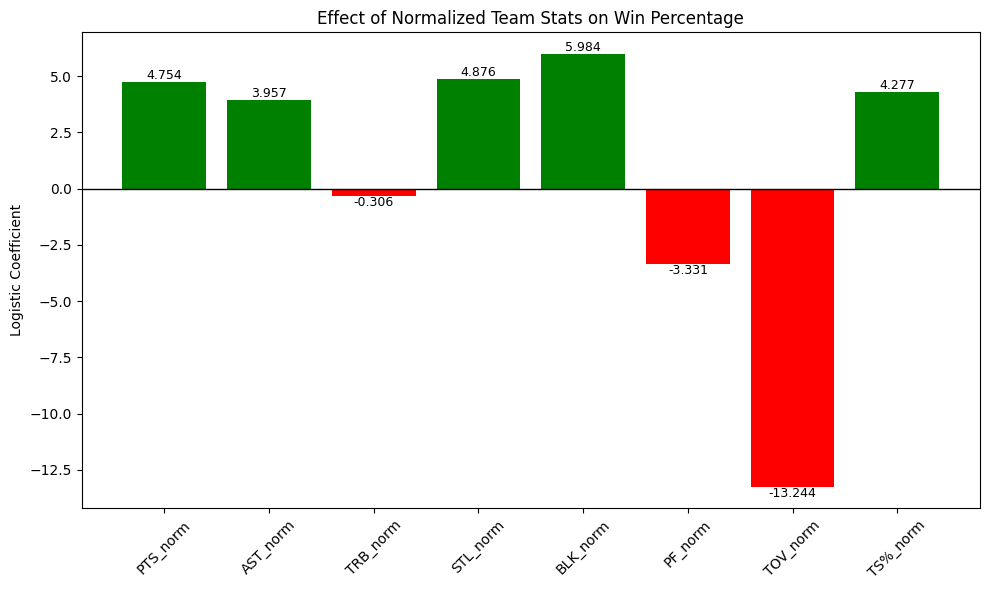

In [106]:
# Base stats to transform (TS% will be added separately)
base_stats = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'PF', 'TOV']

df = nbas_data_full.copy()

if 'TS%' not in df.columns:
    df['TS%'] = df['PTS'] / (2 * (df['FGA'] + 0.44 * df['FTA']))

stats = base_stats + ['TS%']

# 1) Multiply each stat by G and divide by 82 (season-length scaling)
for s in stats:
    df[f'{s}_rate'] = df[s] * df['G'] / 82.0

# 2) Filter out players with less than 3 minutes per game
df = df[df['MP'] >= 3]

# 3) Normalize each transformed stat between 0 and 1 by dividing by its max
norm_cols = []
for s in stats:
    col_rate = f'{s}_rate'
    max_val = df[col_rate].max()
    norm_col = f'{s}_norm'
    df[norm_col] = df[col_rate] / max_val
    norm_cols.append(norm_col)

# 4) Group by team and season, taking mean of normalized stats
team_season = (
    df.groupby(['Season', 'Team'])[norm_cols]
      .mean()
      .reset_index()
)

# 5) Merge with win% from standings
team_season = team_season.merge(
    sts_data_full[['Season', 'Team', 'W%']],
    on=['Season', 'Team'],
    how='inner'
)

# 6) OLS regression of W% on transformed stats
X = sm.add_constant(team_season[norm_cols])
y = team_season['W%']
model = sm.Logit(y, X).fit()
print(model.summary())

# 7) Bar plot of coefficients (excluding constant)
coefs = model.params.drop('const')

plt.figure(figsize=(10, 6))
bars = plt.bar(coefs.index, coefs.values, color=['green' if c > 0 else 'red' for c in coefs.values])
plt.axhline(0, color='black', linewidth=1)
plt.ylabel('Logistic Coefficient')
plt.title('Effect of Normalized Team Stats on Win Percentage')

# Rotate labels for readability
plt.xticks(rotation=45)

# Add coefficient labels
for bar, val in zip(bars, coefs.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + (0.002 if val >= 0 else -0.002),
        f'{val:.3f}',
        ha='center',
        va='bottom' if val >= 0 else 'top',
        fontsize=9
    )

plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     58.28
Date:                Tue, 16 Dec 2025   Prob (F-statistic):           9.04e-77
Time:                        17:46:50   Log-Likelihood:                 491.70
No. Observations:                 630   AIC:                            -963.4
Df Residuals:                     620   BIC:                            -918.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1716      0.028      6.058      0.0

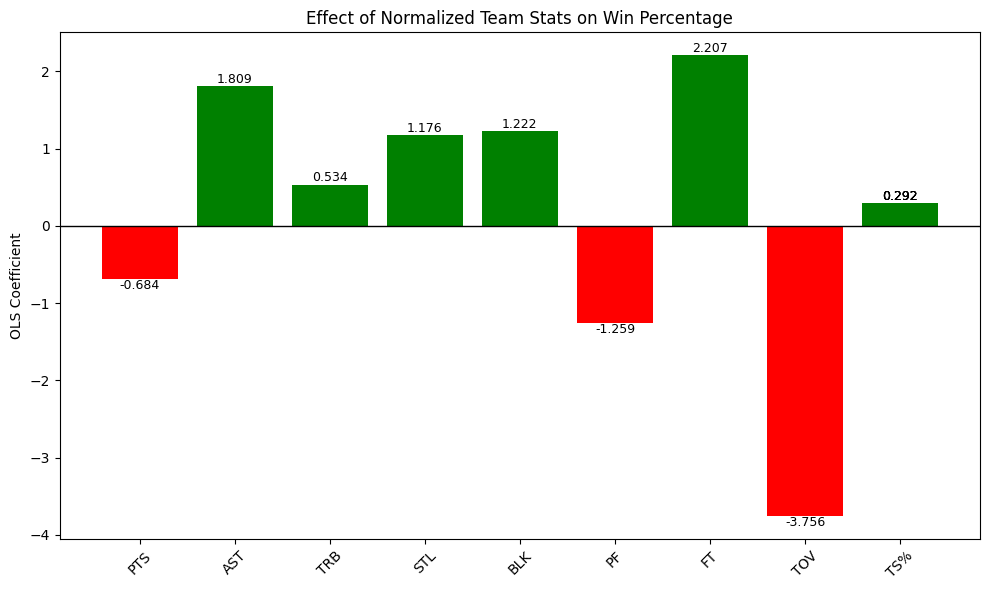

In [107]:

# Base stats to transform (TS% will be added separately)
base_stats = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'PF','FT', 'TOV','TS%']

df = nbas_data_full.copy()



stats = base_stats + ['TS%']

# 1) Multiply each stat by G and divide by 82 (season-length scaling)
for s in stats:
    df[f'{s}_rate'] = df[s] * df['G'] / 82.0

# 2) Filter out players with less than 3 minutes per game
df = df[df['MP'] >= 3]

# 3) Normalize each transformed stat between 0 and 1 by dividing by its max
norm_cols = []
for s in stats:
    col_rate = f'{s}_rate'
    max_val = df[col_rate].max()
    norm_col = f'{s}_norm'
    df[norm_col] = df[col_rate] / max_val
    norm_cols.append(norm_col)

# 4) Group by team and season, taking mean of normalized stats
team_season = (
    df.groupby(['Season', 'Team'])[norm_cols]
      .mean()
      .reset_index()
)

# 5) Merge with win% from standings
team_season = team_season.merge(
    sts_data_full[['Season', 'Team', 'W%']],
    on=['Season', 'Team'],
    how='inner'
)

# 6) OLS regression of W% on transformed stats
X = sm.add_constant(team_season[norm_cols])
y = team_season['W%']
model = sm.OLS(y, X).fit()
print(model.summary())

# 7) Bar plot of coefficients (excluding constant), with clean stat names
coefs = model.params.drop('const')

# Map from norm column names back to base stat names (remove _norm)
clean_index = [name.replace('_norm', '') for name in coefs.index]

plt.figure(figsize=(10, 6))
bars = plt.bar(clean_index, coefs.values,
               color=['green' if c > 0 else 'red' for c in coefs.values])
plt.axhline(0, color='black', linewidth=1)
plt.ylabel('OLS Coefficient')
plt.title('Effect of Normalized Team Stats on Win Percentage')

plt.xticks(rotation=45)

# Add coefficient labels above/below bars
for bar, val in zip(bars, coefs.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + (0.002 if val >= 0 else -0.002),
        f'{val:.3f}',
        ha='center',
        va='bottom' if val >= 0 else 'top',
        fontsize=9
    )

plt.tight_layout()
plt.show()

In [108]:



# Load data
nbas =nbas_data_full

# 1. Choose predictor columns (example set, adjust as needed)
num_cols = [
    'PTS','AST','TRB','STL','BLK',
  'FT','TOV','PF'
]
use_cols = [c for c in num_cols if c in nbas.columns]

# 2. Keep only numeric, drop missing rows
X = nbas[use_cols].apply(pd.to_numeric, errors='coerce').dropna()

# 3. Optionally standardize (not required for VIF, but fine if you want)
# from sklearn.preprocessing import StandardScaler
# X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

# 4. Compute VIF for each column
vif_df = pd.DataFrame({
    'variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print(vif_df.sort_values('VIF', ascending=False))


  variable        VIF
0      PTS  21.821089
6      TOV  20.585320
2      TRB  10.694899
5       FT  10.655107
7       PF  10.468491
1      AST   8.734518
3      STL   7.787603
4      BLK   3.845466


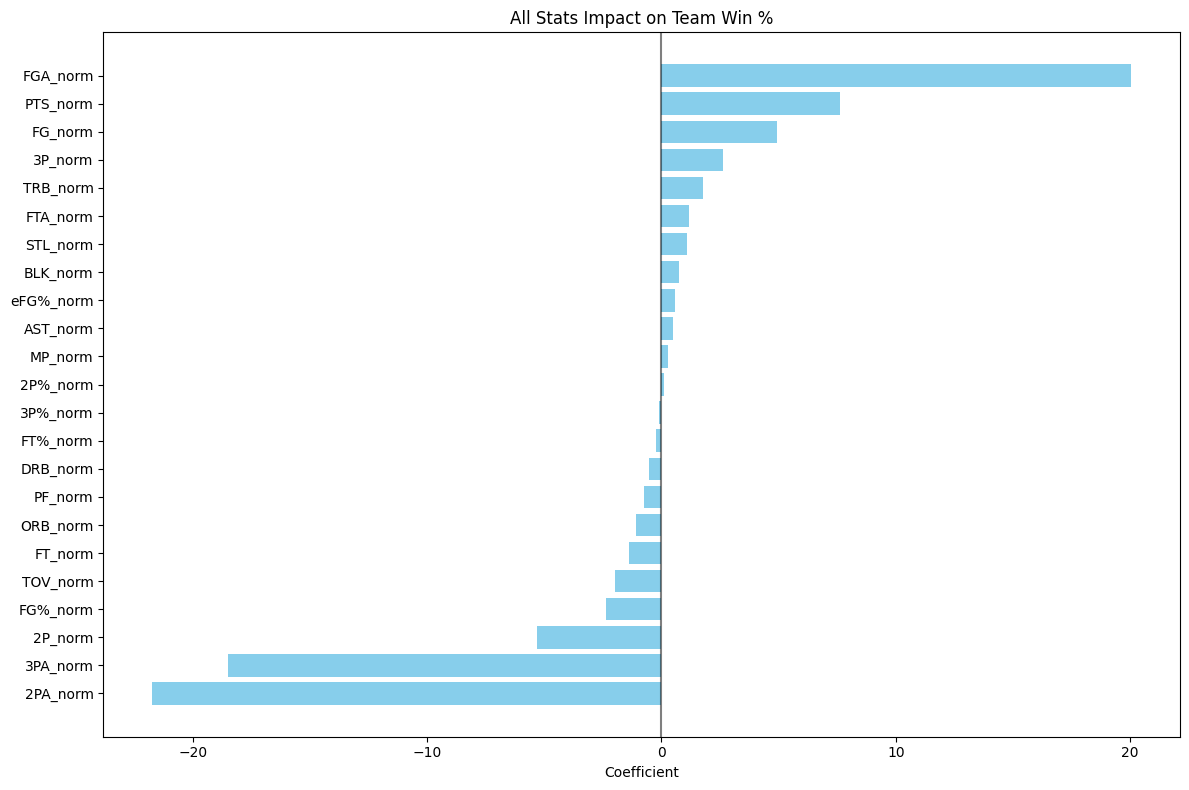

R²: 0.5140
                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     58.28
Date:                Tue, 16 Dec 2025   Prob (F-statistic):           9.04e-77
Time:                        17:46:52   Log-Likelihood:                 491.70
No. Observations:                 630   AIC:                            -963.4
Df Residuals:                     620   BIC:                            -918.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1716      0.028      6.0

In [109]:
# Complete analysis in one block
def run_team_regression():
    # Load & filter
    nbas_df = nbas_data_full
    nbas_df['MP'] = pd.to_numeric(nbas_df['MP'], errors='coerce')
    nbas_df = nbas_df[nbas_df['MP'] >= 5].copy()

    stat_cols = ['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
                 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
                 'BLK', 'TOV', 'PF', 'PTS']

    # Normalize
    for col in stat_cols:
        nbas_df[col] = pd.to_numeric(nbas_df[col], errors='coerce')
        min_val, max_val = nbas_df[col].min(), nbas_df[col].max()
        if max_val > min_val:
            nbas_df[f'{col}_norm'] = (nbas_df[col] - min_val) / (max_val - min_val)

    # Aggregate
    team_stats = nbas_df.groupby(['Team', 'Season'])[[f'{col}_norm' for col in stat_cols]].mean().reset_index()

    # Merge & regress
    sts_df =sts_data_full
    sts_df['W%'] = pd.to_numeric(sts_df['W%'], errors='coerce')
    merged_df = team_stats.merge(sts_df[['Team', 'Season', 'W%']], on=['Team', 'Season'])

    X = merged_df[[f'{col}_norm' for col in stat_cols]].fillna(0)
    y = merged_df['W%'].fillna(0)

    model = LinearRegression()
    model.fit(X, y)

    coefs = pd.DataFrame({'Stat': [f'{col}_norm' for col in stat_cols],
                         'Coefficient': model.coef_}).sort_values('Coefficient')

    plt.figure(figsize=(12, 8))
    plt.barh(range(len(coefs)), coefs['Coefficient'], color='skyblue')
    plt.yticks(range(len(coefs)), coefs['Stat'])
    plt.xlabel('Coefficient')
    plt.title('All Stats Impact on Team Win %')
    plt.axvline(x=0, color='black', alpha=0.5)
    plt.tight_layout()
    plt.show()

    return model.score(X, y), coefs

r2, coefficients = run_team_regression()
print(f"R²: {r2:.4f}")
print(model.summary())

In [110]:
def run_random_forest_analysis():
    """Complete Random Forest analysis pipeline"""

    # Data prep (same as above)
    nbas_df = nbas_data_full
    nbas_df['MP'] = pd.to_numeric(nbas_df['MP'], errors='coerce')
    nbas_df = nbas_df[nbas_df['MP'] >= 5].copy()

    stat_cols = ['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
                 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
                 'BLK', 'TOV', 'PF', 'PTS']

    # Normalize
    for col in stat_cols:
        nbas_df[col] = pd.to_numeric(nbas_df[col], errors='coerce')
        min_val, max_val = nbas_df[col].min(), nbas_df[col].max()
        if max_val > min_val:
            nbas_df[f'{col}_norm'] = (nbas_df[col] - min_val) / (max_val - min_val)

    # Aggregate & merge
    team_stats = nbas_df.groupby(['Team', 'Season'])[[f'{col}_norm' for col in stat_cols]].mean().reset_index()
    sts_df = sts_data_full
    sts_df['W%'] = pd.to_numeric(sts_df['W%'], errors='coerce')
    merged_df = team_stats.merge(sts_df[['Team', 'Season', 'W%']], on=['Team', 'Season'])

    X = merged_df[[f'{col}_norm' for col in stat_cols]].fillna(0)
    y = merged_df['W%'].fillna(0)

    # Train RF
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
    rf.fit(X_train, y_train)

    # Results
    importances = pd.DataFrame({
        'Stat': [f'{col}_norm' for col in stat_cols],
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)

    print(f"Test R²: {rf.score(X_test, y_test):.4f}")
    print("\nTop 10 Features:")
    print(importances.head(10))

    return rf, importances

# Run complete analysis
model, importances = run_random_forest_analysis()


Test R²: 0.3185

Top 10 Features:
         Stat  Importance
20   TOV_norm    0.205413
3    FG%_norm    0.079596
19   BLK_norm    0.073765
11    FT_norm    0.054539
10  eFG%_norm    0.050724
2    FGA_norm    0.048320
14   ORB_norm    0.040257
9    2P%_norm    0.038465
6    3P%_norm    0.034741
18   STL_norm    0.033743


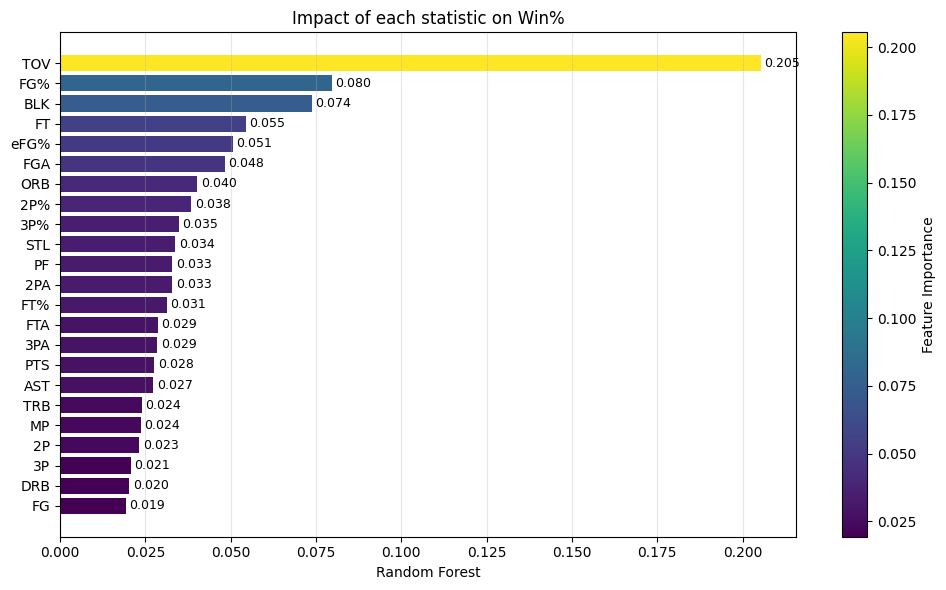

In [111]:
top_n = 30
imp_sorted = importances.sort_values('Importance', ascending=True).tail(top_n).copy()
imp_sorted['Stat_clean'] = imp_sorted['Stat'].str.replace('_norm', '', regex=False)

values = imp_sorted['Importance'].values
norm = (values - values.min()) / (values.max() - values.min() + 1e-9)
colors = cm.viridis(norm)  # choose any cmap: viridis, plasma, coolwarm, etc.

fig, ax = plt.subplots(figsize=(10, 6)) # Explicitly create figure and axes
bars = ax.barh(imp_sorted['Stat_clean'], imp_sorted['Importance'], color=colors)
ax.set_xlabel('Random Forest')
ax.set_title(f'Impact of each statistic on Win%')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', va='center', fontsize=9)

# Optional colorbar
sm = plt.cm.ScalarMappable(cmap=cm.viridis,
                           norm=plt.Normalize(vmin=values.min(), vmax=values.max()))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax) # Pass the axes to the figure's colorbar method
cbar.set_label('Feature Importance')

plt.tight_layout()
plt.show()

## **The code below are our firsts attempts at modeling that didn't make it to the final code. There's no need to examine it we just wanted to keep a trace of our early work**


In [112]:
#Iniating True Shooting percentage TS% to measure a team efficiency
#nbas_data_full['TS%']=nbas_data_full['PTS']/(2*(nbas_data_full['FGA']+0.44*nbas_data_full['FTA']))
#Creating stats "Per 36 minutes"
# We need to normalize the time played per player
#min_played_col='MP'
#stats_to_normalize = [
 #   'PTS', 'AST', 'TRB', 'STL', 'BLK', # Positive Stats
  #  'TOV', 'PF' # Negative Stats
#]

#print(f"Normalisation using'{min_played_col}")
#for stat in stats_to_normalize:
   # new_col_name = f"{stat}_per_36"

    #For every stats, the formule is : (stat / time played) * 36
    # To avoid a zero division we have to use .replace(0,1)
   # nbas_data_full[new_col_name] = (nbas_data_full[stat] / nbas_data_full[min_played_col].replace(0, 1)) * 36
#print("Stats 'per 36 minutes' créées.")
#print(nbas_data_full[['Player','Season', min_played_col, 'PTS', 'PTS_per_36','TS%']].head())

In [113]:
# ---3. Agregate effeciency stats---
# we take new named columns
#stats_eff = [f"{stat}_per_36" for stat in stats_to_normalize]

# We group by season & teams & we calculate the mean of stats_eff
#team_stats_eff = nbas_data_full.groupby(['Season', 'Team'])[stats_eff].mean().reset_index()

#print("\nEffeciency mean stats per team per season:")
#display(team_stats_eff.head())


In [114]:
#First Approach using an arbitrary score
#from numpy import positive
# --- 4. Power Score Calculation ---
#team_scores = team_stats_eff[['Season', 'Team']].copy()

# Separate positive stats frome the negative ones
#positive_stats = ['PTS_per_36', 'AST_per_36', 'TRB_per_36', 'STL_per_36', 'BLK_per_36']
#negative_stats = ['TOV_per_36', 'PF_per_36']

#For positive stats
#for col in positive_stats:
  #  min_score = team_stats_eff[col].min()
   # max_score = team_stats_eff[col].max()
    #col_score_name = f"{col}_score"
    #team_scores[col_score_name] = 1 + 5 * (team_stats_eff[col] - min_score) / (max_score - min_score)


# For negative stats
#for col in negative_stats:
 #   min_score = team_stats_eff[col].min()
  #  max_score = team_stats_eff[col].max()
   # col_score_name = f"{col}_score"
    #team_scores[col_score_name] = 1 + 5 * (max_score - team_stats_eff[col]) / (max_score - min_score)


# Calculate the general mean score
#col_score = [col for col in team_scores.columns if col.endswith('_score')]
#team_scores['Final_Power_Score'] = team_scores[col_score].mean(axis=1)
#team_scores['Final_Power_Score']=(team_scores['Final_Power_Score'])/team_scores['Final_Power_Score'].max()

# Finding the predictible winners from our model
#idx_predicts = team_scores.groupby('Season')['Final_Power_Score'].idxmax()

#pred_winner = team_scores.loc[idx_predicts]
#Actual winner of a season
#idx_winner= sts_data_full.groupby('Season')['W%'].idxmax()
#idx_winner = idx_winner.dropna()
#idx_winner=idx_winner.drop(columns=Dropst,errors='ignore')
#actual_winner=sts_data_full.loc[idx_winner]
#Merging relevant columns to make easier comparaison
#pred1=pred_winner[['Season','Team','Final_Power_Score']]
#actual1=actual_winner[['Team','W%']]
#actual1=actual1.rename(columns={'W%':'Win% of actual winner'})
#Adding actual rank
#pred1 = pred1.merge(sts_data_full[['Season','Team','Rk']],
 #                 on=['Season','Team'],
  #                how='left')


#pred1 = pred1.rename(columns={'Rk_y': 'Actual Rank'})


#Comparaison=pd.concat([pred1.reset_index(drop=True),actual1.reset_index(drop=True)],axis=1)
#Comparaison=Comparaison.rename(columns={'Rk': 'Actual Rank'})

#print("\n Winners based on our model vs actual winners:")
#print(Comparaison)


In [115]:

#Second approach using regression
#reg_stat=['PTS', 'AST', 'TRB', 'STL', 'BLK','TOV', 'PF','TS%','MVP','ALLNBA','DPOY']

#reg_stats_Per36=['PTS_per_36', 'AST_per_36', 'TRB_per_36', 'STL_per_36', 'BLK_per_36','TOV_per_36', 'PF_per_36','TS%','MVP','ALLNBA','DPOY']

#all_stats = reg_stat + [s for s in reg_stats_Per36 if s not in reg_stat] # Combine for team_stats_raw

# We normalized stat by total team game to have a team stat
#norm = nbas_data_full.copy()
#norm[reg_stat] = norm[reg_stat].mul(norm['G'], axis=0) / 82

#team_stats_norm=norm.groupby(['Season','Team'])[all_stats].sum().reset_index()
#regdf= pd.merge(team_stats_norm,sts_data_full,on=['Team','Season'])
#regdf = regdf.drop(columns=['Rk'])
#We created a dataset grouping team summed stat and their season records to facilitate the regression

# Create X1_data and X2_data from regdf for the models
#X1_data = sm.add_constant(regdf[reg_stat])
#X2_data = sm.add_constant(regdf[reg_stats_Per36])

##model1=sm.OLS(regdf['W%'],X1_data).fit()
#predict1=model1.predict(X1_data)
#prediction1 = pd.DataFrame(predict1, columns=['Predicted_W%'])

#We make a second model using stat per36 instead of regular one
##model2=sm.OLS(regdf['W%'],X2_data).fit()
#predict2=model2.predict(X2_data)
#prediction2 = pd.DataFrame(predict2, columns=['Predicted_W%'])

# Reset the index of regdf before merging to ensure proper alignment if indices are not unique
#regdf_reset = regdf.reset_index(drop=True)

# Concatenate prediction1 with the relevant columns from regdf
#result1 = pd.concat([regdf_reset[['Season', 'Team', 'W%']], prediction1], axis=1)
#result2 = pd.concat([regdf_reset[['Season', 'Team', 'W%']], prediction2], axis=1)


#print(model1.summary())
#print(model2.summary())

In [116]:
#mvp_stat=['PTS', 'AST', 'TRB', 'STL', 'BLK','TOV', 'PF','TS%']

#Normalize stat to better compare the coefficient
#X_mvp_raw = sm.add_constant(nbas_data_full[mvp_stat])
#X_mvp_norm = X_mvp_raw.copy()
#norm_cols = []

#for col in mvp_stat:
    #max_val = X_mvp_raw[col].max()
    #X_mvp_norm[col + '_norm'] = X_mvp_raw[col] / max_val
    #norm_cols.append(col + '_norm')

#X_mvp_normalized = X_mvp_norm[['const'] + norm_cols]

#Logistic regression of whether or not a player won an MVP based on normalized stat
#MVP1_norm = sm.Logit(nbas_data_full['MVP'], X_mvp_normalized).fit(disp=0)
#MVP_predict1_norm = MVP1_norm.predict(X_mvp_normalized)

# Use those coefficient to create a MVP score for each player
#MVP_score = nbas_data_full.copy()
#MVP_score['MVP_score'] = MVP_predict1_norm * 100  # Still scale to 0-100 for readability

# Use this MVP score to predict win%
#team_stat_mvp = MVP_score.groupby(['Season','Team'])['MVP_score'].mean().reset_index()
#MVP_reg = pd.merge(team_stat_mvp, sts_data_full, on=['Team','Season'])
#X = sm.add_constant(MVP_reg[['MVP_score']])


#model_MVP = sm.OLS(MVP_reg['W%'], X).fit()
#pred_MVP = model_MVP.predict(X)

# Results
#result = pd.concat([MVP_reg[['Season', 'Team', 'W%']], pd.Series(pred_MVP, name='pred_W%')], axis=1)

#print(MVP_score.head())
#print(MVP1_norm.summary())

In [117]:
#sorted_mvp_scores = MVP_score.sort_values(by='MVP_score', ascending=False)
#display(sorted_mvp_scores[['Player', 'Season', 'MVP_score']].head(20))

In [118]:
#Getting the actual team composition for 2025-2026

#We keep the statistics of 2025
##players_2025 = nbas_data_full[nbas_data_full['Season'] == 2025].copy()


##players_2025.head()
##roster_2026 = pd.read_csv("roster_2026.csv", sep=";") #file with 2025-2026 team composition
#merging table nba_data_full table with 2026 team composition
##players_2026 = players_2025.merge( roster_2026, on='Player', how='inner')

##print(" Team composition for the 2025-2026 season")
##print(players_2026.shape)
##players_2026.head()
##players_2026['Team'] = players_2026['Team_2026']
##players_2026['Season'] = 2026
##players_2026 = players_2026.drop(columns=['Team_2026'])
##players_2026.head()
